In [2]:
from gensim import corpora
from gensim import models

In [3]:
from collections import defaultdict
def get_filtered_words(docs):
    term_fre_dict = defaultdict(int)
    doc_fre_dict = defaultdict(int)
    
    for doc in docs:
        for word in doc:
            term_fre_dict[word] += 1
        for word in set(doc):
            doc_fre_dict[word] += 1
    
    max_doc_frequency = 1000
    min_doc_frequency = 3
    max_term_frequency = 7000
    min_term_frequency = 5
    
    doc_frequency_filtered = {k:v for k, v in doc_fre_dict.items() if ((v>=min_doc_frequency) and (v <= max_doc_frequency))}
    term_frequency_filtered = {k:v for k, v in term_fre_dict.items() if ((v>=min_term_frequency) and (v <= max_term_frequency))}
    both_satisfied = {k:v for k, v in term_frequency_filtered.items() if k in doc_frequency_filtered}
    
    return both_satisfied

def get_highest_topic(topic_list):
    highest_topic = 100
    highest_prob = 0
    for topic, prob in topic_list:
        if prob > highest_prob:
            highest_prob = prob
            highest_topic = topic
    return highest_topic, highest_prob

def build_doc_word_matrix(docs):
    dictionary = corpora.Dictionary(docs)
    corpus = []
    for doc in docs:
        bow = dictionary.doc2bow(doc)
        corpus.append(bow)

    return corpus, dictionary

def print_topic_words(model):
    f = open('topic_results_test.txt','w')
    for topic_id in range(model.num_topics):
        word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        f.write(str(topic_id)+'\n')
        for word, prob in word_probs:
            print("\t{}\t{}".format(word, prob))
            f.write(str(word)+'\t'+str(prob)+'\n')
        print("\n")
    f.close()

In [4]:
NUM_TOPICS = 32
NUM_TOPIC_WORDS = 15

In [5]:
stop_words = ['생각', '까지', '면서', '부터', '대해', '때문', '위해', '대로', '이나', '해주', '도록', '이상', '정말', '내용', '아무', '보고', '래서', '더니', '려면', '고하']

In [6]:
with open('/Users/soothingni/Downloads/NOUN_전체.txt', 'r') as f:
    total_docs = [x.split(',')[-1].strip() for x in f.readlines()]
    
docs_nouns = [x.split(' ') for x in total_docs]

docs_filtered = [[term for term in doc if term not in stop_words and len(term)>1] for doc in docs_nouns]

article_indexes = [k for k in range(len(docs_filtered))]

corpus, dictionary = build_doc_word_matrix(docs_filtered)
# corpus = dtm based on frequency

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 149701
Number of documents: 433919


In [7]:
lda_model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS,
                        id2word=dictionary,
                        alpha='auto')
print_topic_words(lda_model)

#실행할 때마다 결과가 달리짐; 원하는 결과가 나올 때까지

Topic ID: 0
	드립	0.019462356343865395
	국회의원	0.013499580323696136
	의원	0.011276688426733017
	대한	0.010489311069250107
	사회	0.010350758209824562
	국회	0.00952914822846651
	국민	0.008909357711672783
	언론	0.008140960708260536
	자유	0.007824826054275036
	국가	0.006385796703398228
	정치	0.006069549825042486
	단체	0.0058408998884260654
	사하	0.005562876351177692
	뉴스	0.005251601338386536
	정당	0.005015022587031126


Topic ID: 1
	처벌	0.04740900173783302
	피해자	0.03777140751481056
	사건	0.0373452752828598
	범죄	0.023803526535630226
	가해자	0.02036934718489647
	피해	0.018309442326426506
	강력	0.017245473340153694
	폭행	0.016143128275871277
	사람	0.01612301915884018
	보호	0.012496563605964184
	범죄자	0.00930921919643879
	폭력	0.009188780561089516
	일어	0.00916617177426815
	살인	0.008517775684595108
	인권	0.008235241286456585


Topic ID: 2
	연금	0.04381947964429855
	장애인	0.04090429097414017
	복지	0.03743201866745949
	소득	0.03679811954498291
	만원	0.030319252982735634
	기초	0.029041266068816185
	노인	0.02736780047416687
	혜택	0.023192018270492554
	생활	0.02052466757

In [24]:
for i in range(10):
    print(article_indexes[i])
    topics_list = lda_model.get_document_topics(corpus[i])
    print(docs_filtered[i])
    print(topics_list)
    hi_topic, hi_prob = get_highest_topic(topics_list)
    print(hi_topic, hi_prob)
    
    print('\n')

0
['Nouns']
[(0, 0.024016064), (1, 0.017749667), (2, 0.01936987), (3, 0.021828352), (4, 0.017303828), (5, 0.011760894), (6, 0.017241301), (7, 0.01725663), (8, 0.013457728), (9, 0.030587485), (10, 0.038107503), (11, 0.1580208), (12, 0.010802119), (13, 0.031255923), (14, 0.014629998), (15, 0.10124455), (16, 0.054870375), (17, 0.03520924), (18, 0.02211459), (19, 0.019417549), (20, 0.06063874), (21, 0.031920608), (22, 0.015088294), (23, 0.032724503), (24, 0.020791035), (25, 0.026946057), (26, 0.01753084), (27, 0.02309775), (28, 0.029098867), (29, 0.013876159), (30, 0.04163972), (31, 0.01040298)]
11 0.1580208


1
['치과위생사', '국가고시', '날짜', '변경', '안녕하십니까', '대통령', '소개', '위생', '학년', '학생', '저희', '학년', '올해', '아주', '시험', '고생', '조금', '내자', '갑자기', '어제', '톡방', '사실', '한장', '사진', '사진', '국시원', '캡쳐', '국시원', '국가고시', '날짜', '변경', '이글', '널리', '퍼트', '라라', '의미', '용이', '어이', '국시원', '전화', '자신', '나라', '그날', '공무원', '시험', '하루', '자신', '보건복지부', '다시', '날짜', '그날', '내년', '더욱', '이해', '먼저', '그날', '시험', '보기', '시생', '저희', '갑자

### optimal 토픽 수 구하기

# Log perplexity (낮을수록 분류 정확함)

In [20]:
lda_model.log_perplexity(corpus)

-10.002452763182696

In [21]:
start1 = 2
limit1 = 40
step1 = 6
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                    id2word=dictionary,
                    alpha='auto')
    perplexity_scores.append(lda_model.log_perplexity(corpus))

In [22]:
perplexity_scores

[-10.002445234569768,
 -10.002445077737045,
 -10.002431369054753,
 -10.002440666771186,
 -10.002446479559852,
 -10.002449563172174,
 -10.002433292983193]

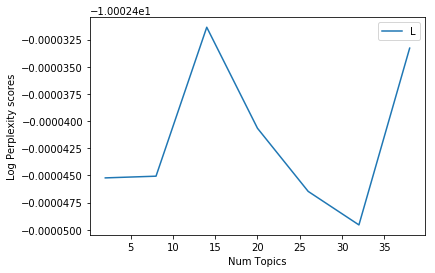

In [24]:
import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

### optimal 토픽 수 구하기 2

# Coherence value (높을수록 일관성 높음)

In [34]:
from gensim.models import CoherenceModel

In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary,
                        alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
docs_filtered = docs_nouns

In [38]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs_filtered, start=2, limit=40, step=6)

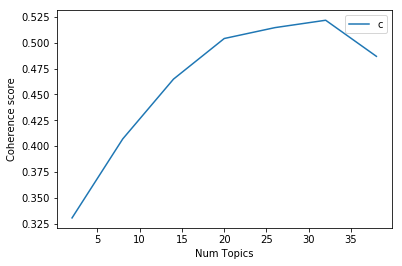

In [40]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### 시각화

In [14]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

/Users/soothingni/anaconda3/lib/python3.7/site-packages/_pytest/mark/structures.py:378: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [ ]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

In [ ]:
pyLDAvis.display(prepared_data)

In [ ]:
pyLDAvis.save_html(prepared_data, 'LDAvis.html')

# 각 단어별 주제 확률 분포 구하기

In [22]:
topics_terms_prob = lda_model.get_topics()

In [23]:
topics_terms_prob.shape

(32, 17702)

In [24]:
topics_terms_prob[:,0]

array([0.00234662, 0.00043946, 0.00076716, 0.00101845, 0.00176091,
       0.00032405, 0.00114549, 0.00087089, 0.00033617, 0.00068748,
       0.00115797, 0.00115417, 0.00097576, 0.00063061, 0.00134147,
       0.00056416, 0.00091615, 0.00050197, 0.00066562, 0.00032532,
       0.00101187, 0.00064697, 0.00094957, 0.0003515 , 0.0003903 ,
       0.00096077, 0.00101995, 0.00067748, 0.00145456, 0.00043453,
       0.00042344, 0.00062045], dtype=float32)

In [25]:
LDA_words = []
for k in lda_model.id2word:
    LDA_words.append(lda_model.id2word[k])

In [26]:
LDA_words[:10]

['각각', '개사', '건설', '격차', '고액', '다음', '단연', '단위', '달라', '대기업']

In [27]:
import numpy as np

In [28]:
np.linalg.norm(topics_terms_prob[:,1]-topics_terms_prob[:,0])

0.005040408

# 각 단어별 주제 확률 분포 구하기

In [21]:
dictionary[0]

'각각'

단어의 id를 이용하여 단어를 추출

In [23]:
words = []
for k in lda_model.id2word:
    words.append(lda_model.id2word[k])

In [44]:
len(words)

17702

In [43]:
print(words[:20])

['각각', '개사', '건설', '격차', '고액', '다음', '단연', '단위', '달라', '대기업', '대비', '롯데', '매출', '몰리', '미만', '반면', '별로', '보고서', '보수', '분류']


In [29]:
words_dict={}
for i, word in enumerate(words):
    words_dict[word]=i

In [25]:
import numpy as np

In [27]:
topics_terms = lda_model.state.get_lambda()

In [28]:
topics_terms_proba = np.apply_along_axis(lambda x: x/x.sum(),1,topics_terms)

In [50]:
# 각 단어의 vector값 찾기, lda 결과를 이용
words_vectors =[]
for word in words:
    word_id = words_dict[word]
#     print(word, word_id, np.argmax(topics_terms_proba[:,word_id]), np.max(topics_terms_proba[:,word_id]))
    words_vectors.append(topics_terms_proba[:,word_id])

In [35]:
words_vectors[0]

array([0.00076944, 0.00077307, 0.00065745, 0.00055214, 0.00053046,
       0.00095415, 0.0002315 , 0.00036521, 0.00126805, 0.0005856 ,
       0.00069747, 0.00040933, 0.00076401, 0.0004752 , 0.00049345,
       0.00101776, 0.00090515, 0.00054887, 0.00048226, 0.00156856,
       0.00026295, 0.00206214, 0.00092678, 0.00117376, 0.00144258,
       0.00022433, 0.00105844, 0.00131164, 0.00051965, 0.00053203,
       0.00028841, 0.00059985], dtype=float32)

In [36]:
np.linalg.norm(words_vectors[0]-words_vectors[1])

0.004607997

In [38]:
np.dot(words_vectors[0], words_vectors[1])/(np.linalg.norm(words_vectors[0])*np.linalg.norm(words_vectors[1]))

0.48024225

In [39]:
np.dot(words_vectors[0], words_vectors[2])/(np.linalg.norm(words_vectors[0])*np.linalg.norm(words_vectors[2]))

0.5642765

In [48]:
word1 = '대기업'
word2 = '롯데'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(words_vectors[word1_id], words_vectors[word2_id])/(np.linalg.norm(words_vectors[word1_id])*np.linalg.norm(words_vectors[word2_id]))

0.13816823

In [41]:
word1 = '각각'
word2 = '개사'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(words_vectors[word1_id], words_vectors[word2_id])/(np.linalg.norm(words_vectors[word1_id])*np.linalg.norm(words_vectors[word2_id]))

0.48024225

In [51]:
word1 = '후보'
word2 = '출마'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(words_vectors[word1_id], words_vectors[word2_id])/(np.linalg.norm(words_vectors[word1_id])*np.linalg.norm(words_vectors[word2_id]))

0.9695528

## 의미연결망

In [28]:
#연결망에 표시할 단어의 수
NUM_WORDS = 10

#선택한 토픽의 인덱스
TOPIC_NUM = 1

def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words        

selected_docs = []
for k in range(len(docs_filtered)):
    topics_list = lda_model.get_document_topics(corpus[k])
    hi_topic, hi_prob = get_highest_topic(topics_list)
    if hi_topic == TOPIC_NUM:
        selected_docs.append(docs_filtered[k])
        
topic_nouns = []
for x in selected_docs:
    topic_nouns.extend(x)

In [26]:
from collections import Counter
c = Counter(topic_nouns)
c.most_common(10)

[('처벌', 33376),
 ('피해자', 24194),
 ('사건', 23474),
 ('사람', 20742),
 ('범죄', 20058),
 ('가해자', 16139),
 ('청소년', 15097),
 ('보호', 12781),
 ('폭행', 12615),
 ('국민', 11614)]

In [29]:
selected_words = get_words(c.most_common(NUM_WORDS))

In [32]:
from kr_sna1 import do_kr_sna
g = do_kr_sna(selected_docs, selected_words)
g.nodes()

NodeView(('처벌', '피해자', '사건', '사람', '범죄', '가해자', '청소년', '보호', '폭행', '국민'))

In [33]:
import networkx as nx
nx.write_graphml(g, 'TOPIC_' + str(TOPIC_NUM) + '.graphml')

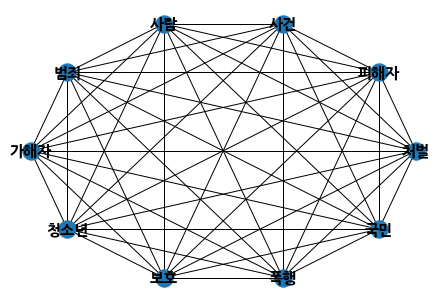

In [59]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#한글폰트 경로 지정해주기
font_name = fm.FontProperties(fname='/Users/soothingni/Library/Fonts/NanumGothicExtraBold.otf').get_name()
pos=nx.shell_layout(g)
nx.draw(g, pos)
nx.draw_networkx_labels(g, pos, font_family = font_name, font_size=15)

plt.show()